In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [60]:
pip install opencv-python

     |████████████████████████████████| 45.9 MB 821 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [34]:
pip install tensorflow 

     |████████████████████████████████| 207.1 MB 197 kB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 5.4 MB/s eta 0:00:011
     |████████████████████████████████| 126 kB 3.9 MB/s eta 0:00:01
     |████████████████████████████████| 463 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 12.2 MB 4.5 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 

In [1]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import necessary  libraries
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
import pandas as pd

#glob used to return all file paths that match a specific pattern
from glob import glob


In [26]:
#path of wav file
normal_w6 = "/Users/yusufakcakaya/Downloads/6_dB_valve/id_00/normal"
abnormal_w6 = "/Users/yusufakcakaya/Downloads/6_dB_valve/id_00/abnormal"

files_normal = glob(normal_w6 + '/*.wav')
files_abnormal = glob(abnormal_w6 + '/*.wav')

# x → audio time series
# sr → sound frequency(Hz)
x,sr = librosa.load(files_normal[0])

x_abnormal,sr_abnormal = librosa.load(files_abnormal[0])

print("x type:",type(x),"sr type",type(sr))

print(x.shape,sr)

x type: <class 'numpy.ndarray'> sr type <class 'int'>
(220500,) 22050


In [30]:
n_abnormal= len(files_abnormal)

n_normal= len(files_normal)

for file in range(n_abnormal):
    x,sr = librosa.load(files_abnormal[file])
    

    


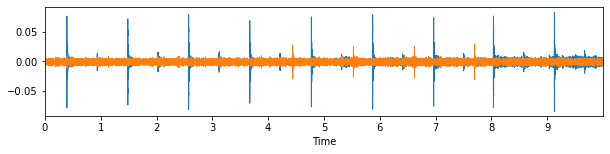

In [29]:
# Viewing audio

plt.figure(figsize=(10,2))

librosa.display.waveplot(x,sr=sr)


librosa.display.waveplot(x_abnormal,sr=sr_abnormal)

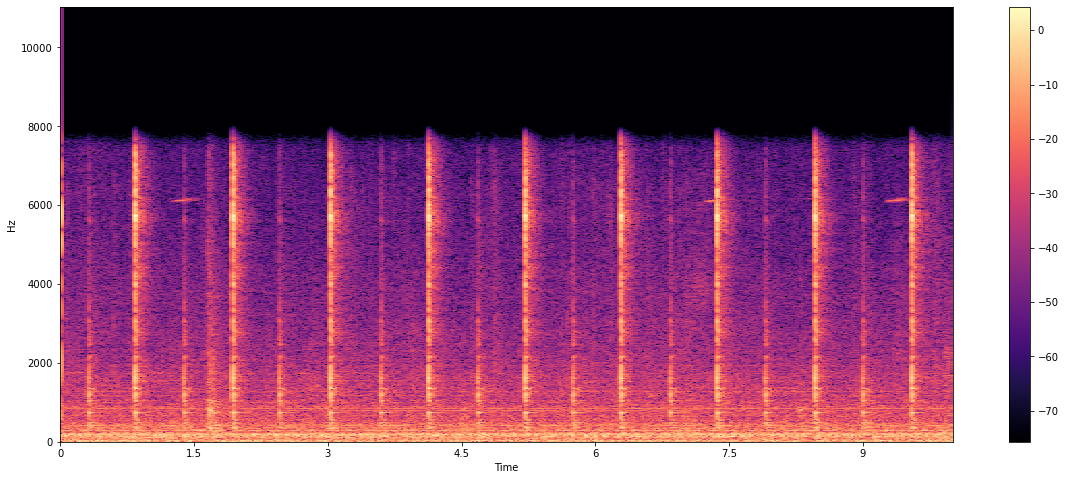

In [5]:
X=librosa.stft(x) # stft -> Short-time Fourier transform

Xdb=librosa.amplitude_to_db(abs(X)) # Amplitude to Decibel

plt.figure(figsize=(20,8))

librosa.display.specshow(Xdb, sr= sr, x_axis= "time", y_axis= "hz")
plt.colorbar()

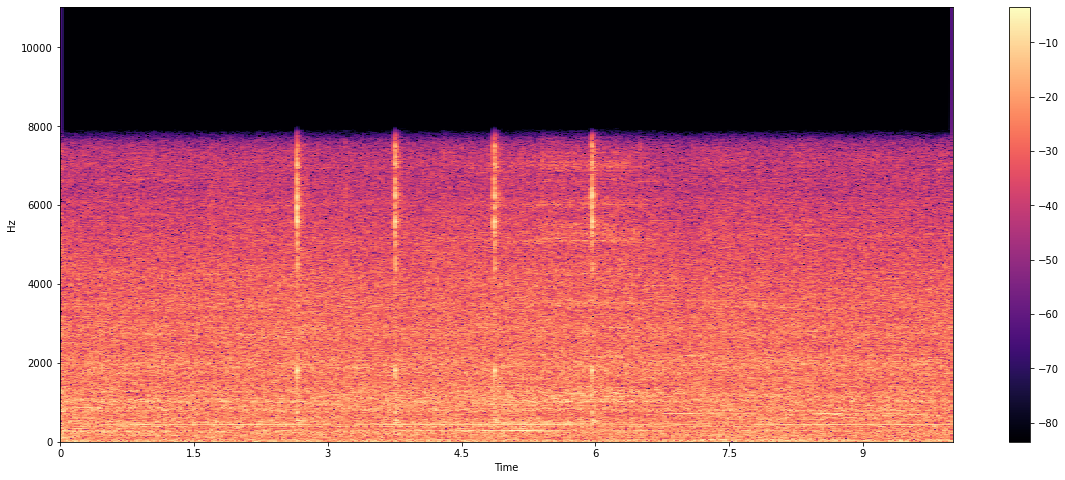

In [6]:
X= librosa.stft(x_abnormal) # stft -> Short-time Fourier transform

Xdb=librosa.amplitude_to_db(abs(X)) # Amplitude to Decibel

plt.figure(figsize=(20,8))

librosa.display.specshow(Xdb, sr= sr_abnormal, x_axis= "time", y_axis= "hz")
plt.colorbar()


In [7]:
print("x type:",type(Xdb))
print(Xdb.shape)

x type: <class 'numpy.ndarray'>
(1025, 431)


In [2]:
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
import pandas as pd
import random
from scipy.io import wavfile
from sklearn.preprocessing import scale
import librosa.display
import librosa
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
import time

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

from tensorflow.keras.models import load_model

import pathlib
import cv2
from tqdm import tqdm




In [4]:
#path of wav file
normal_w6 = "/Users/yusufakcakaya/Downloads/6_dB_valve/id_00/normal"
abnormal_w6 = "/Users/yusufakcakaya/Downloads/6_dB_valve/id_00/abnormal"

files_normal = glob(normal_w6 + '/*.wav')
files_abnormal = glob(abnormal_w6 + '/*.wav')


In [8]:
n_abnormal= len(files_abnormal)

n_normal= len(files_normal)

for file in range(n_normal):
    data, sr = librosa.load(files_normal[file])
    data = scale(data)
        

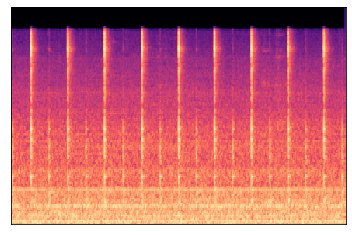

In [14]:
count = 1
countstr = str(count)

melspec = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128)
           
log_melspec = librosa.power_to_db(melspec, ref=np.max)  
librosa.display.specshow(log_melspec, sr=sr)
            
    
# save to png
directory = 'MIMMII'
if not os.path.exists(directory):
    os.makedirs(directory)
png_number="normal"+ countstr  


plt.savefig(directory + '/' + (countstr) + '.png')

path=(directory + '/' + (countstr) + '.png')
count += 1

In [77]:

normal_w6 = "/Users/yusufakcakaya/Downloads/6_dB_valve/id_00/normal"
abnormal_w6 = "/Users/yusufakcakaya/Downloads/6_dB_valve/id_00/abnormal"


def to_png(files,name,list_name):
    
    list_name = []
    
    files = glob(files + '/*.wav')
    print('len of files', len(files))
    
    
    for file in range(20):

        data, sr = librosa.load(files[file])
        data = scale(data)
       
        countstr = str(file)

        melspec = librosa.feature.melspectrogram(y=data, sr=sr, n_mels=128)
           
        log_melspec = librosa.power_to_db(melspec, ref=np.max)  
        librosa.display.specshow(log_melspec, sr=sr)
            
    
        # save to png
        directory = name+'_png'
        if not os.path.exists(directory):
            os.makedirs(directory)
        
        png_number= name + countstr  


        plt.savefig(directory + '/' + (png_number) + '.png')
        
      
        
        
    

In [78]:
normal_v02 = "/Users/yusufakcakaya/Downloads/6_dB_valve/id_00/normal"
abnormal_v02 = "/Users/yusufakcakaya/Downloads/6_dB_valve/id_00/abnormal"


len of files 991


/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/skle

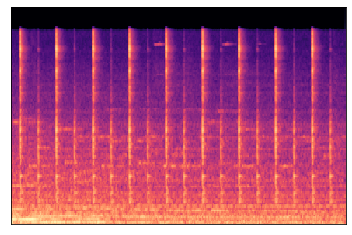

In [79]:
to_png(normal_v02,'valveNormal','list_normal')

len of files 119


/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/skle

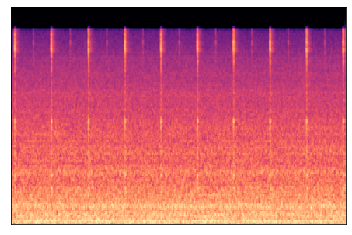

In [80]:
to_png(abnormal_v02,'valveAbnormal','list_abnormal')

len of files 991


/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/skle

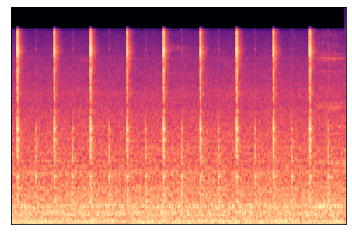

In [48]:
to_png(normal_w6,'valveNormal','list_normal')

len of files 119


/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:211: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/skle

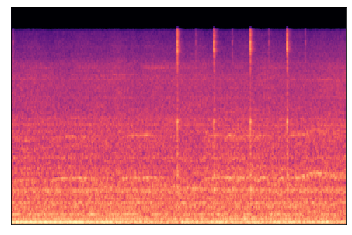

In [49]:
to_png(abnormal_w6,'valveAbnormal','list_abnormal')

### Create a dataset

In [54]:
#Define some parameters for the loader

batch_size = 32
img_height = 180
img_width = 180

In [52]:
image_dir = 'valveNormal_png'
image_root = pathlib.Path(image_dir)
list_ds = tf.data.Dataset.list_files(str(image_root/'*.png'))
for f in list_ds:
  image = tf.io.read_file(f)
  image = tf.io.decode_png(image)

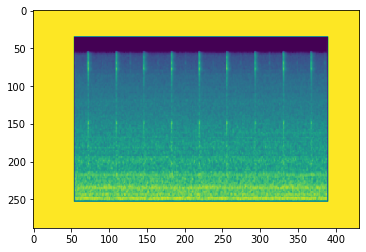

In [63]:
datadir = "image"

catagories = ["valveAbnormal_png", "valveNormal_png"]

for category in catagories:  
    path = os.path.join(datadir,category)  # create path to normal/abnormal
    for img in os.listdir(path):  # iterate over each image per normal/abnormal
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array)  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [64]:
print(img_array)


[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [65]:
print(img_array.shape)


(288, 432)


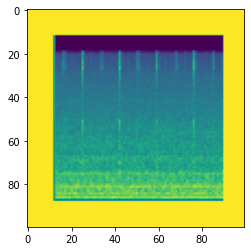

In [70]:
#size was big so we transform it to minimum

IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()


In [72]:
training_data = []

def create_training_data():
    for category in catagories:  

        path = os.path.join(datadir,category)  # create path 
        class_num = catagories.index(category)  # get the classification  (0 or a 1). 0=Abnormal 1=normal

        for img in tqdm(os.listdir(path)):  # iterate over each image per two of them
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 100/100 [00:00<00:00, 416.24it/s]

200


Next, we want to shuffle the data. Right now our data is just all dogs, then all cats. This will usually wind up causing trouble too, as, initially, the classifier will learn to just predict dogs always. Then it will shift to oh, just predict all cats! Going back and forth like this is no good either.

In [73]:
import random

random.shuffle(training_data)

In [74]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
1
0
1
1
0
0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

let’s define the path to our data. Let’s define a function called get_data() that makes it easier for us to create our train and validation dataset. We define the two labels ‘normal’ and ‘abnormal’ that we will use. We use the Opencv imread function to read the images in the RGB format and resize the images to our desired width and height in this case both being 224.

In [4]:
datadir = "image"
labels = ["valveAbnormal_png", "valveNormal_png"]
img_size = 224

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)


In [5]:
#fetch our train and validation data

train = get_data('image')
val = get_data('validation')

<ipython-input-4-6a467fc35a26>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [11]:
train[0,0].shape


(224, 224, 3)

### Visualize the data 

 We use seaborn to plot the number of images in both the classes and you can see what the output looks like.

/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

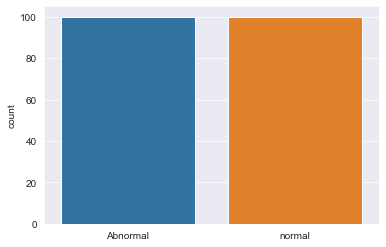

In [84]:
import seaborn as sns

l = []
for i in train:
    if(i[1] == 0):
        l.append("Abnormal")
    else:
        l.append("normal")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'valveAbnormal_png')

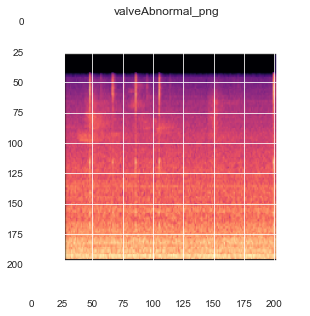

In [86]:
# random visualize
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'valveNormal_png')

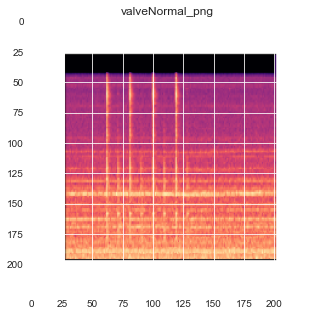

In [88]:
#normal
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [89]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [90]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [94]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [98]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) , metrics = ['accuracy'])

history = model.fit(x_train,y_train,epochs = 500 , validation_data = (x_val, y_val))


/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500


/Users/yusufakcakaya/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


7/7 [==============================] - 5s 586ms/step - loss: 0.6946 - accuracy: 0.4850 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/500
7/7 [==============================] - 4s 588ms/step - loss: 0.6893 - accuracy: 0.5500 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 3/500
7/7 [==============================] - 4s 602ms/step - loss: 0.6941 - accuracy: 0.5050 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 4/500
7/7 [==============================] - 4s 628ms/step - loss: 0.6906 - accuracy: 0.5250 - val_loss: 0.6936 - val_accuracy: 0.5000
Epoch 5/500
7/7 [==============================] - 4s 613ms/step - loss: 0.6973 - accuracy: 0.4750 - val_loss: 0.6934 - val_accuracy: 0.4750
Epoch 6/500
7/7 [==============================] - 4s 613ms/step - loss: 0.6900 - accuracy: 0.5600 - val_loss: 0.6931 - val_accuracy: 0.5250
Epoch 7/500
7/7 [==============================] - 5s 644ms/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 8/500
7/7 [========

Epoch 59/500
7/7 [==============================] - 4s 592ms/step - loss: 0.6788 - accuracy: 0.6150 - val_loss: 0.6810 - val_accuracy: 0.8000
Epoch 60/500
7/7 [==============================] - 4s 589ms/step - loss: 0.6858 - accuracy: 0.5900 - val_loss: 0.6807 - val_accuracy: 0.8500
Epoch 61/500
7/7 [==============================] - 4s 595ms/step - loss: 0.6840 - accuracy: 0.5600 - val_loss: 0.6805 - val_accuracy: 0.8250
Epoch 62/500
7/7 [==============================] - 4s 602ms/step - loss: 0.6802 - accuracy: 0.6250 - val_loss: 0.6802 - val_accuracy: 0.8000
Epoch 63/500
7/7 [==============================] - 4s 592ms/step - loss: 0.6837 - accuracy: 0.5750 - val_loss: 0.6799 - val_accuracy: 0.8000
Epoch 64/500
7/7 [==============================] - 4s 586ms/step - loss: 0.6797 - accuracy: 0.6000 - val_loss: 0.6797 - val_accuracy: 0.7500
Epoch 65/500
7/7 [==============================] - 4s 578ms/step - loss: 0.6829 - accuracy: 0.6250 - val_loss: 0.6794 - val_accuracy: 0.8000
Epoch 

7/7 [==============================] - 4s 592ms/step - loss: 0.6680 - accuracy: 0.7250 - val_loss: 0.6606 - val_accuracy: 0.8500
Epoch 117/500
7/7 [==============================] - 4s 586ms/step - loss: 0.6635 - accuracy: 0.7000 - val_loss: 0.6602 - val_accuracy: 0.8750
Epoch 118/500
7/7 [==============================] - 4s 580ms/step - loss: 0.6640 - accuracy: 0.6800 - val_loss: 0.6598 - val_accuracy: 0.8250
Epoch 119/500
7/7 [==============================] - 4s 572ms/step - loss: 0.6617 - accuracy: 0.6850 - val_loss: 0.6594 - val_accuracy: 0.8000
Epoch 120/500
7/7 [==============================] - 4s 560ms/step - loss: 0.6581 - accuracy: 0.7250 - val_loss: 0.6590 - val_accuracy: 0.8000
Epoch 121/500
7/7 [==============================] - 4s 595ms/step - loss: 0.6548 - accuracy: 0.7100 - val_loss: 0.6585 - val_accuracy: 0.8000
Epoch 122/500
7/7 [==============================] - 4s 590ms/step - loss: 0.6620 - accuracy: 0.6600 - val_loss: 0.6578 - val_accuracy: 0.8750
Epoch 123/500

7/7 [==============================] - 4s 582ms/step - loss: 0.6304 - accuracy: 0.7700 - val_loss: 0.6289 - val_accuracy: 0.8750
Epoch 174/500
7/7 [==============================] - 4s 623ms/step - loss: 0.6311 - accuracy: 0.7900 - val_loss: 0.6284 - val_accuracy: 0.8750
Epoch 175/500
7/7 [==============================] - 4s 604ms/step - loss: 0.6295 - accuracy: 0.7700 - val_loss: 0.6278 - val_accuracy: 0.8500
Epoch 176/500
7/7 [==============================] - 4s 595ms/step - loss: 0.6324 - accuracy: 0.7900 - val_loss: 0.6271 - val_accuracy: 0.8500
Epoch 177/500
7/7 [==============================] - 4s 580ms/step - loss: 0.6312 - accuracy: 0.7550 - val_loss: 0.6266 - val_accuracy: 0.8250
Epoch 178/500
7/7 [==============================] - 4s 591ms/step - loss: 0.6333 - accuracy: 0.7600 - val_loss: 0.6264 - val_accuracy: 0.8250
Epoch 179/500
7/7 [==============================] - 4s 576ms/step - loss: 0.6259 - accuracy: 0.7450 - val_loss: 0.6255 - val_accuracy: 0.8000
Epoch 180/500

7/7 [==============================] - 4s 575ms/step - loss: 0.5974 - accuracy: 0.8150 - val_loss: 0.5957 - val_accuracy: 0.8750
Epoch 231/500
7/7 [==============================] - 4s 581ms/step - loss: 0.5979 - accuracy: 0.8100 - val_loss: 0.5951 - val_accuracy: 0.8500
Epoch 232/500
7/7 [==============================] - 4s 562ms/step - loss: 0.5996 - accuracy: 0.8000 - val_loss: 0.5946 - val_accuracy: 0.8000
Epoch 233/500
7/7 [==============================] - 4s 560ms/step - loss: 0.5948 - accuracy: 0.8000 - val_loss: 0.5940 - val_accuracy: 0.8500
Epoch 234/500
7/7 [==============================] - 4s 576ms/step - loss: 0.5912 - accuracy: 0.8300 - val_loss: 0.5935 - val_accuracy: 0.8750
Epoch 235/500
7/7 [==============================] - 4s 576ms/step - loss: 0.5943 - accuracy: 0.8050 - val_loss: 0.5931 - val_accuracy: 0.8750
Epoch 236/500
7/7 [==============================] - 4s 557ms/step - loss: 0.5933 - accuracy: 0.8200 - val_loss: 0.5924 - val_accuracy: 0.8750
Epoch 237/500

7/7 [==============================] - 4s 625ms/step - loss: 0.5735 - accuracy: 0.8050 - val_loss: 0.5627 - val_accuracy: 0.8250
Epoch 288/500
7/7 [==============================] - 4s 620ms/step - loss: 0.5616 - accuracy: 0.8400 - val_loss: 0.5622 - val_accuracy: 0.8250
Epoch 289/500
7/7 [==============================] - 4s 574ms/step - loss: 0.5701 - accuracy: 0.7900 - val_loss: 0.5616 - val_accuracy: 0.8250
Epoch 290/500
7/7 [==============================] - 4s 576ms/step - loss: 0.5650 - accuracy: 0.8450 - val_loss: 0.5610 - val_accuracy: 0.8250
Epoch 291/500
7/7 [==============================] - 4s 560ms/step - loss: 0.5619 - accuracy: 0.8350 - val_loss: 0.5605 - val_accuracy: 0.8250
Epoch 292/500
7/7 [==============================] - 4s 578ms/step - loss: 0.5622 - accuracy: 0.8100 - val_loss: 0.5600 - val_accuracy: 0.8500
Epoch 293/500
7/7 [==============================] - 4s 571ms/step - loss: 0.5606 - accuracy: 0.8300 - val_loss: 0.5593 - val_accuracy: 0.8500
Epoch 294/500

7/7 [==============================] - 4s 580ms/step - loss: 0.5323 - accuracy: 0.8450 - val_loss: 0.5303 - val_accuracy: 0.9000
Epoch 345/500
7/7 [==============================] - 4s 559ms/step - loss: 0.5379 - accuracy: 0.8550 - val_loss: 0.5296 - val_accuracy: 0.9000
Epoch 346/500
7/7 [==============================] - 4s 561ms/step - loss: 0.5388 - accuracy: 0.8650 - val_loss: 0.5301 - val_accuracy: 0.9000
Epoch 347/500
7/7 [==============================] - 4s 564ms/step - loss: 0.5326 - accuracy: 0.8700 - val_loss: 0.5291 - val_accuracy: 0.9000
Epoch 348/500
7/7 [==============================] - 4s 562ms/step - loss: 0.5430 - accuracy: 0.8200 - val_loss: 0.5281 - val_accuracy: 0.9000
Epoch 349/500
7/7 [==============================] - 4s 571ms/step - loss: 0.5267 - accuracy: 0.8800 - val_loss: 0.5274 - val_accuracy: 0.9000
Epoch 350/500
7/7 [==============================] - 4s 570ms/step - loss: 0.5361 - accuracy: 0.8250 - val_loss: 0.5258 - val_accuracy: 0.8750
Epoch 351/500

7/7 [==============================] - 4s 570ms/step - loss: 0.5084 - accuracy: 0.8600 - val_loss: 0.4980 - val_accuracy: 0.8750
Epoch 402/500
7/7 [==============================] - 4s 568ms/step - loss: 0.5080 - accuracy: 0.8800 - val_loss: 0.4987 - val_accuracy: 0.9000
Epoch 403/500
7/7 [==============================] - 4s 565ms/step - loss: 0.5029 - accuracy: 0.8900 - val_loss: 0.4972 - val_accuracy: 0.9000
Epoch 404/500
7/7 [==============================] - 4s 564ms/step - loss: 0.5048 - accuracy: 0.8650 - val_loss: 0.4961 - val_accuracy: 0.8750
Epoch 405/500
7/7 [==============================] - 4s 567ms/step - loss: 0.4984 - accuracy: 0.8550 - val_loss: 0.4958 - val_accuracy: 0.8750
Epoch 406/500
7/7 [==============================] - 4s 570ms/step - loss: 0.5024 - accuracy: 0.8500 - val_loss: 0.4957 - val_accuracy: 0.9000
Epoch 407/500
7/7 [==============================] - 4s 566ms/step - loss: 0.5049 - accuracy: 0.8650 - val_loss: 0.4956 - val_accuracy: 0.9000
Epoch 408/500

7/7 [==============================] - 5s 668ms/step - loss: 0.4748 - accuracy: 0.8850 - val_loss: 0.4669 - val_accuracy: 0.8750
Epoch 459/500
7/7 [==============================] - 4s 632ms/step - loss: 0.4803 - accuracy: 0.8600 - val_loss: 0.4663 - val_accuracy: 0.8750
Epoch 460/500
7/7 [==============================] - 5s 658ms/step - loss: 0.4809 - accuracy: 0.8600 - val_loss: 0.4665 - val_accuracy: 0.9000
Epoch 461/500
7/7 [==============================] - 4s 558ms/step - loss: 0.4809 - accuracy: 0.8550 - val_loss: 0.4669 - val_accuracy: 0.9000
Epoch 462/500
7/7 [==============================] - 4s 586ms/step - loss: 0.4759 - accuracy: 0.8850 - val_loss: 0.4665 - val_accuracy: 0.9000
Epoch 463/500
7/7 [==============================] - 4s 539ms/step - loss: 0.4742 - accuracy: 0.8550 - val_loss: 0.4658 - val_accuracy: 0.9000
Epoch 464/500
7/7 [==============================] - 4s 567ms/step - loss: 0.4740 - accuracy: 0.8650 - val_loss: 0.4641 - val_accuracy: 0.8750
Epoch 465/500

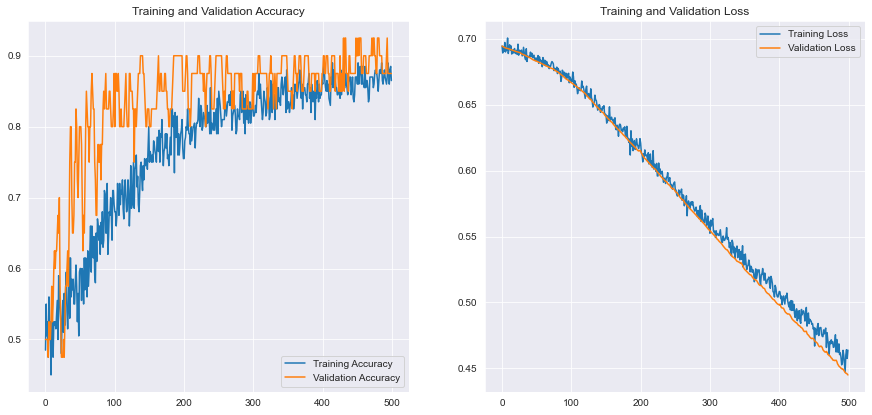

In [99]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(500)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()